In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import datetime as dt

In [4]:
carelink = pd.read_csv('carelink1116.csv')

In [5]:
print(carelink.head())
(carelink.info())

        date_time      Date      Time Bolus Volume Delivered (U) Bolus Source
0  11/15/19 14:24  11/15/19  14:24:50                        1.5       MANUAL
1  11/15/19 14:23  11/15/19  14:23:49                        NaN       MANUAL
2  11/15/19 14:23  11/15/19  14:23:34                        NaN          NaN
3  11/15/19 14:23  11/15/19  14:23:34                        NaN          NaN
4  11/15/19 14:12  11/15/19  14:12:00                        NaN          NaN
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19739 entries, 0 to 19738
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   date_time                   19739 non-null  object
 1   Date                        19738 non-null  object
 2   Time                        19738 non-null  object
 3   Bolus Volume Delivered (U)  6658 non-null   object
 4   Bolus Source                6936 non-null   object
dtypes: object(5)
memory usage: 

In [6]:
auto = carelink[carelink['Bolus Source'] == 'CLOSED_LOOP_MICRO_BOLUS'].reset_index()
print(auto.head())

   index      date_time      Date     Time Bolus Volume Delivered (U)  \
0    251  11/13/19 2:48  11/13/19  2:48:47                       0.03   
1    264  11/13/19 2:33  11/13/19  2:33:50                       0.03   
2    265  11/13/19 2:23  11/13/19  2:23:51                       0.03   
3    266  11/13/19 2:13  11/13/19  2:13:56                       0.03   
4    267  11/13/19 2:08  11/13/19  2:08:56                       0.03   

              Bolus Source  
0  CLOSED_LOOP_MICRO_BOLUS  
1  CLOSED_LOOP_MICRO_BOLUS  
2  CLOSED_LOOP_MICRO_BOLUS  
3  CLOSED_LOOP_MICRO_BOLUS  
4  CLOSED_LOOP_MICRO_BOLUS  


In [7]:
auto['date_time']= pd.to_datetime(auto['date_time'])
print(auto.head())

   index           date_time      Date     Time Bolus Volume Delivered (U)  \
0    251 2019-11-13 02:48:00  11/13/19  2:48:47                       0.03   
1    264 2019-11-13 02:33:00  11/13/19  2:33:50                       0.03   
2    265 2019-11-13 02:23:00  11/13/19  2:23:51                       0.03   
3    266 2019-11-13 02:13:00  11/13/19  2:13:56                       0.03   
4    267 2019-11-13 02:08:00  11/13/19  2:08:56                       0.03   

              Bolus Source  
0  CLOSED_LOOP_MICRO_BOLUS  
1  CLOSED_LOOP_MICRO_BOLUS  
2  CLOSED_LOOP_MICRO_BOLUS  
3  CLOSED_LOOP_MICRO_BOLUS  
4  CLOSED_LOOP_MICRO_BOLUS  


In [8]:
auto['Hour'] = auto.date_time.dt.hour
auto['Day'] = auto.date_time.dt.day
print(auto.head())

   index           date_time      Date     Time Bolus Volume Delivered (U)  \
0    251 2019-11-13 02:48:00  11/13/19  2:48:47                       0.03   
1    264 2019-11-13 02:33:00  11/13/19  2:33:50                       0.03   
2    265 2019-11-13 02:23:00  11/13/19  2:23:51                       0.03   
3    266 2019-11-13 02:13:00  11/13/19  2:13:56                       0.03   
4    267 2019-11-13 02:08:00  11/13/19  2:08:56                       0.03   

              Bolus Source  Hour  Day  
0  CLOSED_LOOP_MICRO_BOLUS     2   13  
1  CLOSED_LOOP_MICRO_BOLUS     2   13  
2  CLOSED_LOOP_MICRO_BOLUS     2   13  
3  CLOSED_LOOP_MICRO_BOLUS     2   13  
4  CLOSED_LOOP_MICRO_BOLUS     2   13  


In [9]:
auto.rename(columns = {'Bolus Volume Delivered (U)':'bolus'}, inplace = True)
print(auto.head())

   index           date_time      Date     Time bolus  \
0    251 2019-11-13 02:48:00  11/13/19  2:48:47  0.03   
1    264 2019-11-13 02:33:00  11/13/19  2:33:50  0.03   
2    265 2019-11-13 02:23:00  11/13/19  2:23:51  0.03   
3    266 2019-11-13 02:13:00  11/13/19  2:13:56  0.03   
4    267 2019-11-13 02:08:00  11/13/19  2:08:56  0.03   

              Bolus Source  Hour  Day  
0  CLOSED_LOOP_MICRO_BOLUS     2   13  
1  CLOSED_LOOP_MICRO_BOLUS     2   13  
2  CLOSED_LOOP_MICRO_BOLUS     2   13  
3  CLOSED_LOOP_MICRO_BOLUS     2   13  
4  CLOSED_LOOP_MICRO_BOLUS     2   13  


In [10]:
auto['bolus'] = auto['bolus'].astype(float)

In [11]:
hourly_delivery = auto.groupby(['Day', 'Hour']).bolus.sum().reset_index()  
day_df = hourly_delivery.groupby('Day').Hour.count().reset_index()
sel_days = hourly_delivery[(hourly_delivery.Day > 2) & (hourly_delivery.Day != 18)]

sel_days_ave = sel_days.groupby('Day').bolus.sum().reset_index()
print(sel_days_ave.bolus.mean())

sel_days_ave.rename(columns={'bolus':'effective basal rate in auto mode'}, inplace=True)
#print(sel_days_ave)
sel_days_ave.to_csv('effective_daily_basal.csv')


group_sel_days = sel_days.groupby('Day').Hour.count().reset_index()

ave_hr_delivery = sel_days.groupby('Hour').bolus.sum().reset_index() 
ave_hr_delivery['bolus'] = ave_hr_delivery.bolus/(len(group_sel_days.Day))  
#print(sel_days)

19.98


In [12]:
std_hr_delivery = hourly_delivery.groupby('Hour').bolus.std().reset_index()
std_hr_delivery.rename(columns = {'bolus':'standard_deviation'}, inplace = True)

#print(std_hr_delivery.head())


In [13]:
new_table = pd.merge(ave_hr_delivery, std_hr_delivery)
print(new_table)

    Hour     bolus  standard_deviation
0      0  1.184643            0.578072
1      1  1.038929            0.484420
2      2  0.879286            0.447657
3      3  0.768571            0.408012
4      4  0.801786            0.469432
5      5  0.607500            0.366582
6      6  0.704286            0.399389
7      7  0.996786            0.443305
8      8  0.798571            0.472957
9      9  0.841786            0.543175
10    10  1.096429            0.524464
11    11  1.035000            0.542608
12    12  0.798571            0.540851
13    13  0.919643            0.457108
14    14  0.729643            0.536436
15    15  0.516071            0.409475
16    16  0.829286            0.474488
17    17  0.652500            0.417241
18    18  0.740714            0.527155
19    19  0.620714            0.433206
20    20  0.671071            0.633674
21    21  0.906429            0.517489
22    22  0.866786            0.490421
23    23  0.975000            0.405283


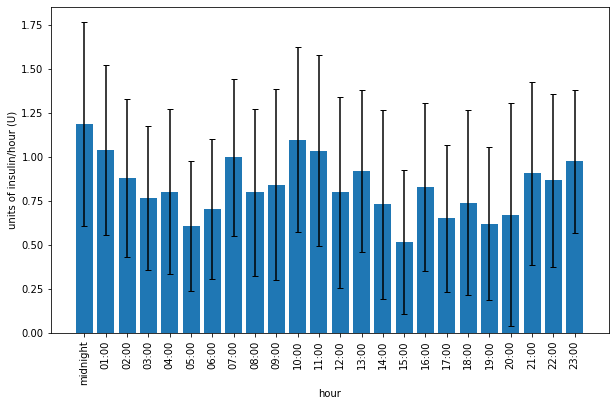

In [14]:
plt.figure(figsize=(10, 6))
ax=plt.subplot()
plt.bar(range(len(new_table.Hour)), new_table.bolus, yerr=new_table.standard_deviation, capsize=3)
plt.xlabel('hour')
plt.ylabel('units of insulin/hour (U)')
ax.set_xticks(new_table['Hour'])
ax.set_xticklabels(['midnight', '01:00', '02:00', '03:00', '04:00', '05:00', '06:00', '07:00', '08:00', '09:00', '10:00', '11:00', '12:00', '13:00', '14:00', '15:00', '16:00', '17:00', '18:00', '19:00', '20:00', '21:00', '22:00', '23:00'], rotation='90')

plt.show()

In [15]:
basal = pd.read_csv('basal.csv')
#print(basal.head())

In [16]:
compare = pd.merge(basal, new_table)
print(compare.head())

   Hour  basal_rate2  basal_rate1     bolus  standard_deviation
0     0         0.90          0.8  1.184643            0.578072
1     1         0.75          0.6  1.038929            0.484420
2     2         0.75          0.6  0.879286            0.447657
3     3         0.75          0.6  0.768571            0.408012
4     4         0.75          0.6  0.801786            0.469432


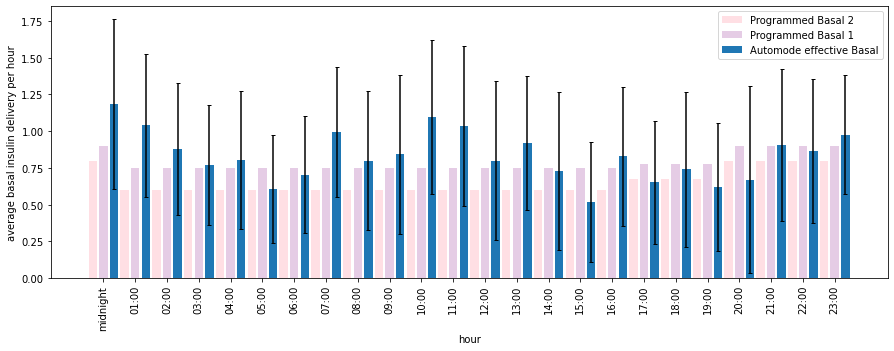

19.98


In [17]:
def create_x(t, w, n, d):
    return [t*x + w*n for x in range(d)]
b1x = create_x(3, 1, 1, 24)
b2x = create_x(3, 1, 2, 24)
act = create_x(3, 1, 3, 24)

plt.figure(figsize=(15, 5))
ax=plt.subplot()
plt.bar(b1x, compare.basal_rate1, alpha=0.50, color='pink')
plt.bar(b2x, compare.basal_rate2, alpha=0.20, color='purple')
plt.bar(act, compare.bolus, yerr=new_table.standard_deviation, capsize=2)
plt.legend(['Programmed Basal 2', 'Programmed Basal 1', 'Automode effective Basal'])
plt.xlabel('hour')
plt.ylabel('average basal insulin delivery per hour')
ax.set_xticks(3*compare['Hour']+2)
ax.set_xticklabels(['midnight', '01:00', '02:00', '03:00', '04:00', '05:00', '06:00', '07:00', '08:00', '09:00', '10:00', '11:00', '12:00', '13:00', '14:00', '15:00', '16:00', '17:00', '18:00', '19:00', '20:00', '21:00', '22:00', '23:00'], rotation=90)
plt.savefig('auto_comparison.png')
plt.show()
print(compare.bolus.sum())

In [18]:
compare.to_csv('autocompare.csv')

In [19]:
print(hourly_delivery.head())

   Day  Hour  bolus
0    1     0   1.62
1    1     1   1.42
2    1     2   1.02
3    1     3   0.88
4    1     4   0.14


In [20]:
#day6 = hourly_delivery[hourly_delivery.Day == 6]
#for day in hourly_delivery.Day:
 #   if day is in group_sel_days.Day:
  #      df = hourly_delivery[hourly_delivery.Day == day]
   #     plt.plot(df.Hour, df.bolus)
        

day7 = hourly_delivery[hourly_delivery.Day == 7]
day3 = hourly_delivery[hourly_delivery.Day == 3]
day4 = hourly_delivery[hourly_delivery.Day == 4]
day5 = hourly_delivery[hourly_delivery.Day == 5]
print(day7)

     Day  Hour  bolus
109    7     0   1.53
110    7     1   1.47
111    7     2   1.53
112    7     3   0.63
113    7     4   0.17
114    7     5   0.16
115    7     6   0.27
116    7     7   1.26
117    7     8   0.65
118    7     9   0.30
119    7    10   0.08
120    7    11   1.20
121    7    12   0.53
122    7    13   0.75
123    7    14   0.30
124    7    15   0.68
125    7    16   0.09
126    7    17   0.06
127    7    18   1.07
128    7    19   0.73
129    7    20   0.37
130    7    21   0.84
131    7    22   0.55
132    7    23   1.62


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


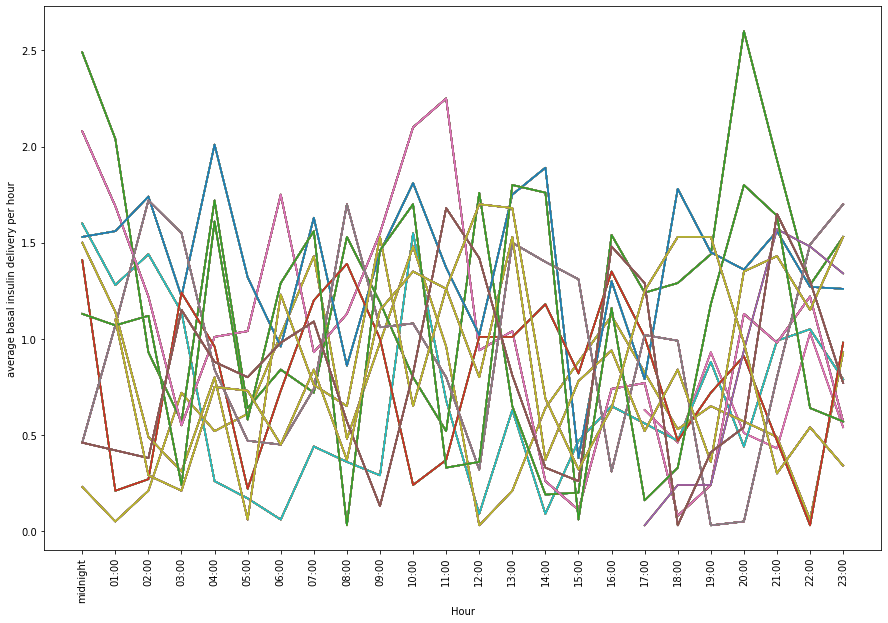

In [21]:
plt.figure(figsize=(15, 10))
#plt.plot(day3.Hour, day3.bolus)
#plt.plot(day4.Hour, day4.bolus)
#plt.plot(day5.Hour, day5.bolus)
#plt.plot(day7.Hour, day7.bolus)
for day in hourly_delivery.Day:
    if day in group_sel_days.Day:
        if day %2 == 0:
            df = hourly_delivery[hourly_delivery.Day == day]
            plt.plot(df.Hour, df.bolus)
ax=plt.subplot()
ax.set_xticks(range(24))
ax.set_xticklabels(ax.set_xticklabels(['midnight', '01:00', '02:00', '03:00', '04:00', '05:00', '06:00', '07:00', '08:00', '09:00', '10:00', '11:00', '12:00', '13:00', '14:00', '15:00', '16:00', '17:00', '18:00', '19:00', '20:00', '21:00', '22:00', '23:00'], rotation=90))
plt.xlabel('Hour')
plt.ylabel('average basal insulin delivery per hour')
plt.savefig('day_comparison.png')
plt.show()